In [48]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import requests
import numpy as np
import pandas as pd
import json
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import rcParams

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import seaborn as sb

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
sample=pd.read_csv('/home/codonnell/tutors/tutmain/all_tutors.csv')
sample.head()

,Unnamed: 0,Unnamed: 0.1,@context,@type,@id,paymentAccepted,currenciesAccepted,description,priceRange,image,...,bio,background_check,sunday,monday,tuesday,wednesday,thursday,friday,saturday,tot_tuts
0,0,0,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Los_Angeles/7...,"Credit card, Paypal",USD,Fun Experienced Tutor!,60.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,"['Hi!', ""I'm an experienced tutor with a sense...",1.0,"[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, False, False, F...","[True, True, True, True, True, False, False, F...",NaN
1,1,1,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Valley_Villag...,"Credit card, Paypal",USD,Top-Rated Test Prep (SAT / ACT / ISEE / HSPT) ...,95.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,"[""I am an experienced (3000+ hours) tutor cert...",1.0,"[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",NaN
2,2,2,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Tarzana/7614535/,"Credit card, Paypal",USD,Congratulations to my students entering Harvar...,95.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,['MARCH 2020: IN ORDER TO ASSIST MORE STUDENTS...,1.0,"[False, False, False, False, False, False, Fal...","[True, True, False, False, False, False, False...","[True, True, True, True, True, True, False, Fa...","[True, True, True, True, True, True, False, Fa...","[True, True, True, True, True, True, False, Fa...","[False, False, False, True, True, True, False,...","[True, True, True, True, True, True, False, Fa...",NaN
3,3,3,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Winnetka/7636...,"Credit card, Paypal",USD,Master of Science in Education in Teaching /CA...,40.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,"['Over a decade, I have been teaching biology ...",1.0,[None],[None],[None],[None],[None],[None],[None],NaN
4,4,4,http://schema.org,ProfessionalService,https://www.wyzant.com/Tutors/CA/Culver_City/7...,"Credit card, Paypal",USD,I will help your English sound native.,25.0,https://dj1hlxw0wr920.cloudfront.net/userfiles...,...,"[""My name is Karlton- I'm 36. Although I have ...",1.0,"[True, True, True, False, False, False, False,...","[True, True, False, False, False, False, False...","[True, True, True, False, False, False, False,...","[True, True, True, False, False, False, False,...","[True, True, True, False, False, False, False,...","[False, False, False, False, False, False, Fal...","[True, True, True, False, False, False, False,...",NaN


In [3]:
sample['priceRange'] = sample['priceRange'].apply(float)

In [4]:
def get_subject_list(sub_list):
    sub_dicts = json.loads(sub_list.replace("'",'"'))
    return [sub['name'] for sub in sub_dicts]

In [10]:
def listToString(s):
    str1 = " " 
    return (str1.join(s)) 

In [11]:
sample['subject_list'] = sample['makesOffer'].apply(get_subject_list)
sample['subject_list_joined'] = sample['subject_list'].apply(listToString)

In [12]:
sample['subject_list_joined'].iloc[0]

'Precalculus tutoring French tutoring European History tutoring Calculus tutoring Spanish tutoring'

In [13]:
stopWords = ['tutoring'] 

tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 20000,
    stop_words = stopWords
)
tfidf.fit(sample['subject_list_joined'])
text = tfidf.transform(sample['subject_list_joined'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


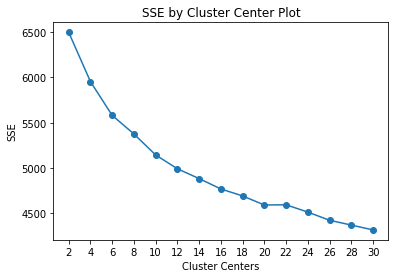

In [15]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 30)

In [40]:
clusters = MiniBatchKMeans(n_clusters=7, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/home/codonnell/anaconda3/envs/insight/lib/python3.8/site-packages/matplotlib/collections.py:960: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No handles with labels found to put in legend.
No handles with labels found to put in legend.


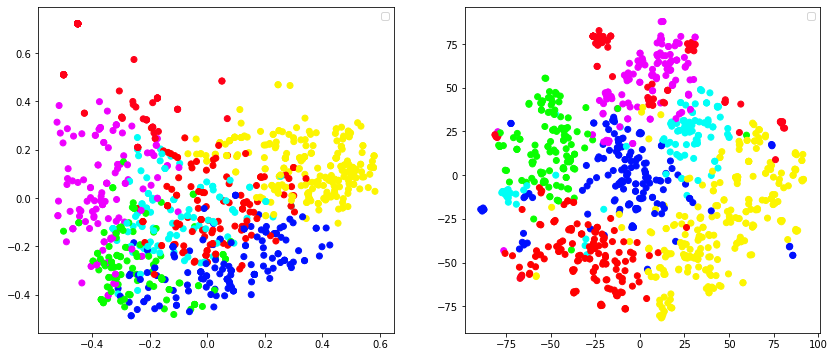

In [50]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=5000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=1000, replace=False)
    
    # choose only labels associated with subset of data 
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    #ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    #ax[0].set_title('PCA Cluster Plot')
    
    #ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    #ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

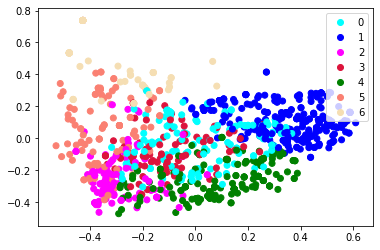

In [54]:
max_label = max(clusters)
max_items = np.random.choice(range(text.shape[0]), size=5000, replace=False)
    
pca = PCA(n_components=2).fit_transform(text[max_items,:].todense())
#tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(text[max_items,:].todense()))
    
idx = np.random.choice(range(pca.shape[0]), size=1000, replace=False)
label_sub = clusters[max_items]
label_sub = [2*i for i in label_sub[idx]]

x = pca[idx, 0]
y = pca[idx, 1]
#x = tsne[idx, 0]
#y = tsne[idx, 1]

classes = list(set(clusters))
values = label_sub
colours = ListedColormap(['aqua','blue','yellow','fuchsia','gold','crimson','green','grey','salmon','wheat'])
scatter = plt.scatter(x, y,c=values,cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [42]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
accounting,science,elementary,powerpoint,computer,word,math,algebra,excel,microsoft

Cluster 1
act,chemistry,prealgebra,geometry,precalculus,trigonometry,calculus,physics,math,algebra

Cluster 2
act,social,european,english,studies,world,american,writing,reading,history

Cluster 3
grammar,study,skills,algebra,spelling,phonics,reading,math,6th,elementary

Cluster 4
psat,elementary,science,algebra,writing,english,math,reading,sat,act

Cluster 5
literature,proofreading,vocabulary,spanish,reading,grammar,writing,english,esol,esl

Cluster 6
accounting,proofreading,biochemistry,saxophone,biology,music,chemistry,esl,esol,spanish


In [43]:
cluster_df = pd.DataFrame({'cluster': clusters, 'hourly_rate': sample['priceRange'].values})
cluster_df.head()

,cluster,hourly_rate
0,6,60.0
1,0,95.0
2,2,95.0
3,3,40.0
4,2,25.0


In [45]:
cluster_df.groupby('cluster')['hourly_rate'].mean()

cluster
0     81.938907
1     71.671141
2     67.464928
3     49.078563
4    130.410162
5     52.293873
6     50.880952
Name: hourly_rate, dtype: float64

In [46]:
pd.Series(clusters).value_counts()

1    2384
4    1358
0    1244
2    1112
5     963
3     891
6     714
dtype: int64

In [34]:
def cluster_var(text):
    
    for i in range(3,10):
        clusters = MiniBatchKMeans(n_clusters=i, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
        cluster_df = pd.DataFrame({'cluster': clusters, 'hourly_rate': sample['priceRange'].values})
        print(cluster_df.groupby('cluster')['hourly_rate'].mean().to_frame()['hourly_rate'].std())
cluster_var(text)

12.291685187594043
22.80342716375643
27.781454630275388
28.13484604527312
28.550925286177193
21.207469077086017
25.084281738097474
